In [1]:
import pandas as pd
import seaborn
import os
import math
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import OptimizeWarning
import warnings

sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.potential_data as potential_data
import common.scaler as scaler
import common.plots as plots
import common.fit as fit

pd.options.mode.chained_assignment = None
warnings.simplefilter("ignore", OptimizeWarning)
warnings.simplefilter("ignore", RuntimeWarning)

                         r/a   T     aV(r)       err
temperature range_min_T                             
280.3       5              1   2  0.018177  0.000006
            5              1   3  0.017986  0.000006
            5              1   4  0.017908  0.000006
            5              1   5  0.017862  0.000006
            5              1   6  0.017830  0.000006
...                      ...  ..       ...       ...
112.1       10            16  16  0.351243  0.017312
            10            16  17  0.397261  0.025300
            10            16  18  0.377804  0.035410
            10            16  19  0.441023  0.054619
            10            16  20  0.379505  0.077192

[1824 rows x 4 columns]


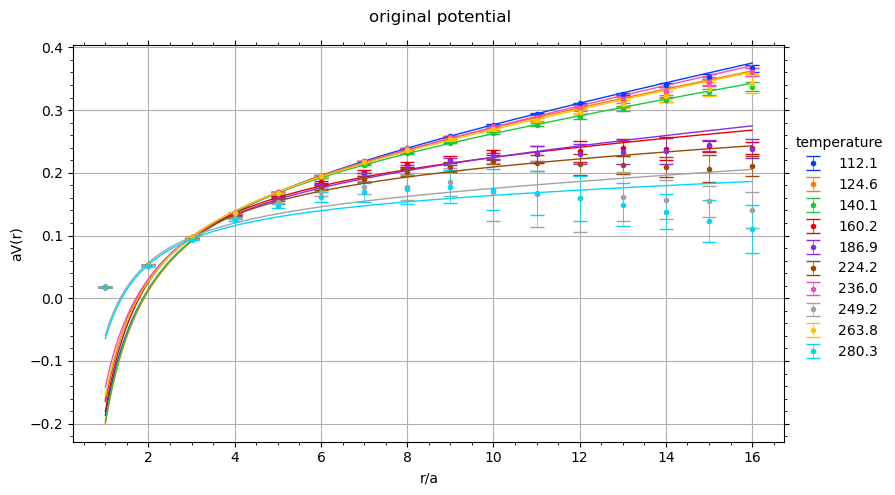

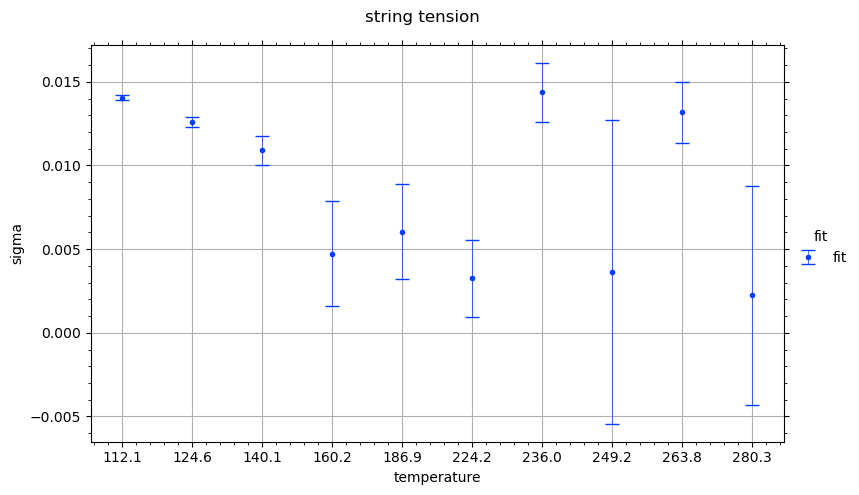

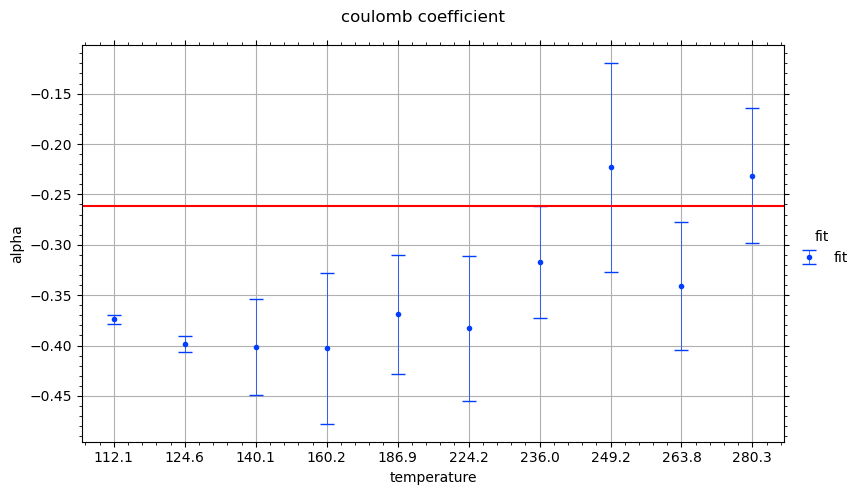

In [2]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'temperature'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x16/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/16/a:.1f}', 'range_min_T': 5}, 'constraints': {'time_size': (1, 8)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x17/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/17/a:.1f}', 'range_min_T': 5}, 'constraints': {'time_size': (1, 8)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x18/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/18/a:.1f}', 'range_min_T': 6}, 'constraints': {'time_size': (1, 9)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x19/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/19/a:.1f}', 'range_min_T': 6}, 'constraints': {'time_size': (1, 9)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x20/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/20/a:.1f}', 'range_min_T': 7}, 'constraints': {'time_size': (1, 10)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x24/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/24/a:.1f}', 'range_min_T': 9}, 'constraints': {'time_size': (1, 12)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/28/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 14)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x32/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/32/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 16)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/36/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 18)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/40/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 20)}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['temperature', 'range_min_T'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
print(df)
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, fit.func_exponent, ['V', 'a', 'b'], include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=13, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='temperature')
df_curves = df_curves.reset_index(level='temperature')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'temperature': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='temperature')
plots.plot_potential_single(df_fit, 'temperature', 'sigma', 'fit', 'temperature', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'temperature', 'alpha', 'fit', 'temperature', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

In [4]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'temperature'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x16/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/16/a:.1f}', 'range_min_T': 5}, 'constraints': {'time_size': (1, 8)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x17/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/17/a:.1f}', 'range_min_T': 5}, 'constraints': {'time_size': (1, 8)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x18/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/18/a:.1f}', 'range_min_T': 6}, 'constraints': {'time_size': (1, 9)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x19/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/19/a:.1f}', 'range_min_T': 6}, 'constraints': {'time_size': (1, 9)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x20/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/20/a:.1f}', 'range_min_T': 7}, 'constraints': {'time_size': (1, 10)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x24/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/24/a:.1f}', 'range_min_T': 9}, 'constraints': {'time_size': (1, 12)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/28/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 14)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x32/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/32/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 16)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/36/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 18)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.15/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/40/a:.1f}', 'range_min_T': 10}, 'constraints': {'time_size': (1, 20)}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['temperature', 'range_min_T'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
print(df)
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, fit.func_exponent, ['V', 'a', 'b'], include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_screened, ['V0', 'alpha', 'mass'], 'r/a', 'aV(r)', 'err', range_min_len=13, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'mass'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_screened, 'r/a', 'aV(r)', ['V0', 'alpha', 'mass'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='temperature')
df_curves = df_curves.reset_index(level='temperature')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'temperature': x_fit, 'mass': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='temperature')
plots.plot_potential_single(df_fit, 'temperature', 'mass', 'fit', 'temperature', 'mass', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='mass_err')
plots.plot_potential_single(df_fit, 'temperature', 'alpha', 'fit', 'temperature', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                         r/a   T     aV(r)       err
temperature range_min_T                             
280.3       5              1   2  0.018177  0.000006
            5              1   3  0.017986  0.000006
            5              1   4  0.017908  0.000006
            5              1   5  0.017862  0.000006
            5              1   6  0.017830  0.000006
...                      ...  ..       ...       ...
112.1       10            16  16  0.351243  0.017312
            10            16  17  0.397261  0.025300
            10            16  18  0.377804  0.035410
            10            16  19  0.441023  0.054619
            10            16  20  0.379505  0.077192

[1824 rows x 4 columns]


TypeError: cannot convert the series to <class 'float'>

             r/a   T     aV(r)       err
temperature                             
186.9          1   2  0.018281  0.000003
186.9          1   3  0.018101  0.000004
186.9          1   4  0.018032  0.000004
186.9          1   5  0.017998  0.000004
186.9          1   6  0.017976  0.000004
...          ...  ..       ...       ...
112.1         16  16  0.338562  0.016691
112.1         16  17  0.346623  0.022085
112.1         16  18  0.394996  0.031921
112.1         16  19  0.405981  0.049679
112.1         16  20  0.481695  0.078624

[1200 rows x 4 columns]


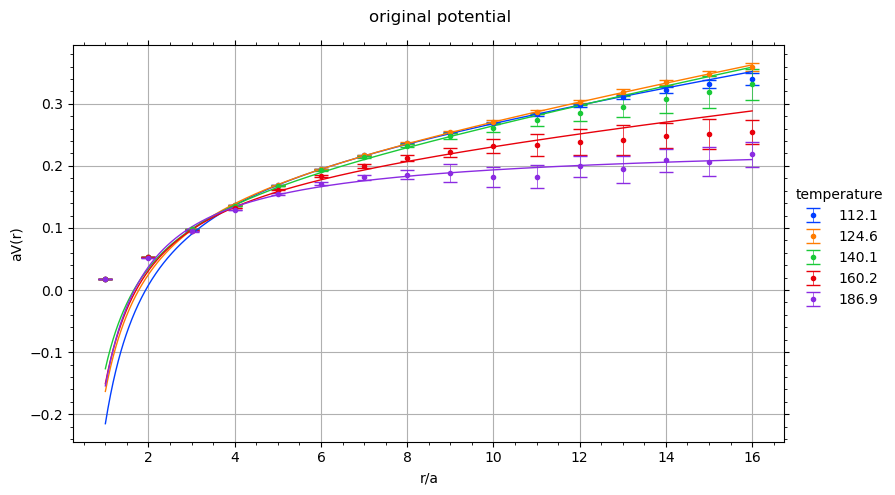

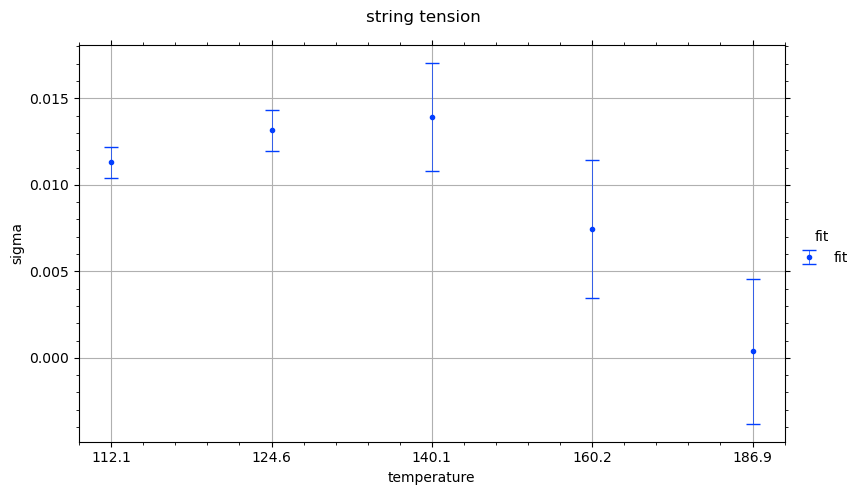

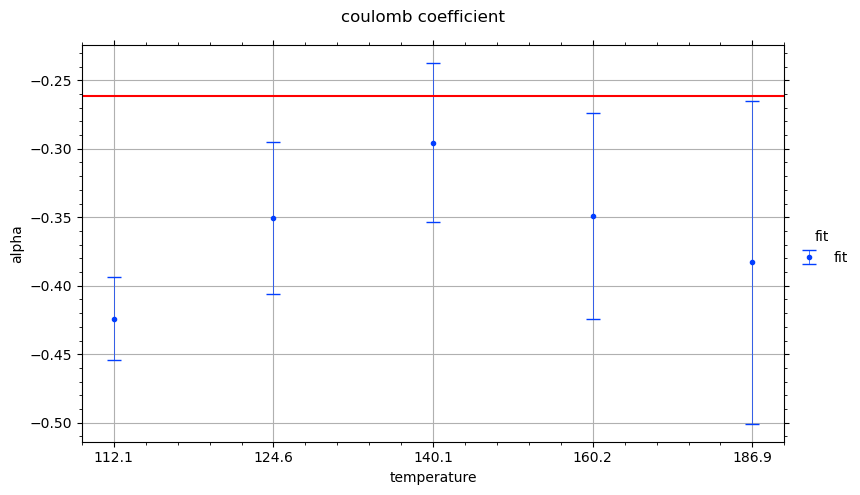

In [3]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'temperature'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x24/mu0.20/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/24/a:.1f}'}, 'constraints': {'time_size': (1, 12)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.20/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/28/a:.1f}'}, 'constraints': {'time_size': (1, 14)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x32/mu0.20/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/32/a:.1f}'}, 'constraints': {'time_size': (1, 16)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.20/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/36/a:.1f}'}, 'constraints': {'time_size': (1, 18)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.20/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/40/a:.1f}'}, 'constraints': {'time_size': (1, 20)}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['temperature'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
print(df)
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, fit.func_exponent, ['V', 'a', 'b'], 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='temperature')
df_curves = df_curves.reset_index(level='temperature')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'temperature': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='temperature')
plots.plot_potential_single(df_fit, 'temperature', 'sigma', 'fit', 'temperature', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'temperature', 'alpha', 'fit', 'temperature', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

             r/a   T     aV(r)       err
temperature                             
186.9          1   2  0.018170  0.000005
186.9          1   3  0.017967  0.000005
186.9          1   4  0.017883  0.000005
186.9          1   5  0.017836  0.000005
186.9          1   6  0.017808  0.000005
...          ...  ..       ...       ...
112.1         16  16  0.273042  0.017661
112.1         16  17  0.255122  0.022082
112.1         16  18  0.281060  0.026745
112.1         16  19  0.291626  0.035888
112.1         16  20  0.295962  0.048217

[1200 rows x 4 columns]


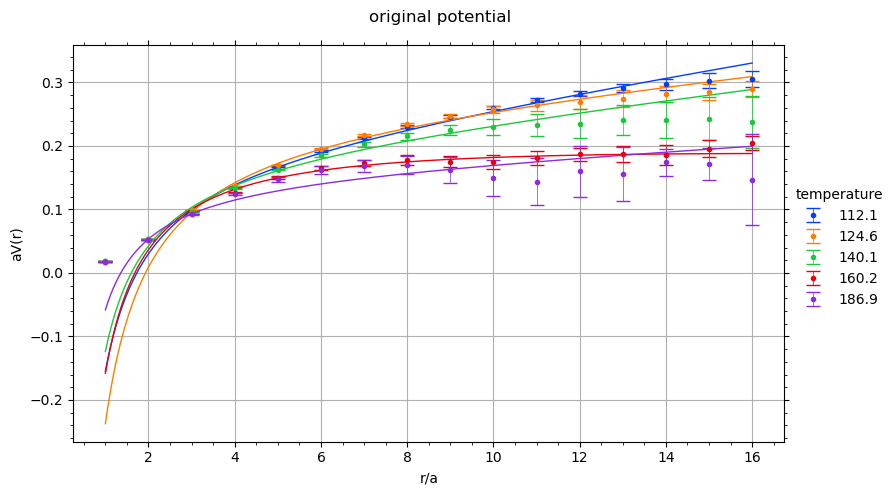

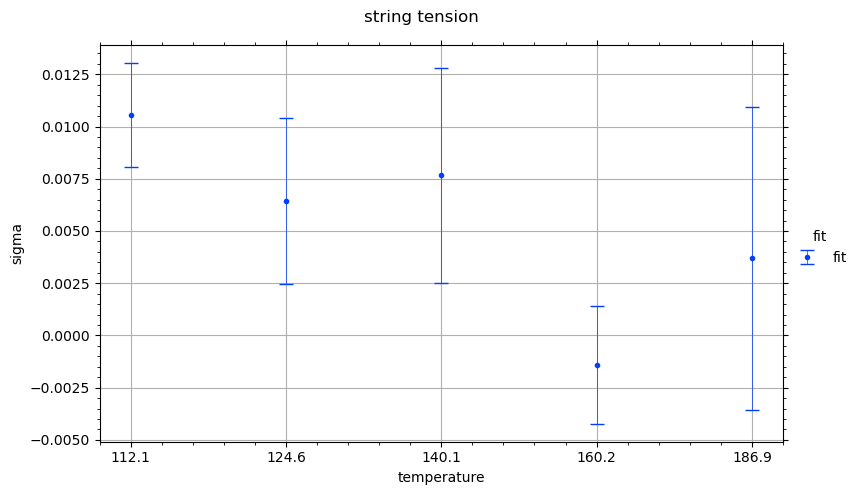

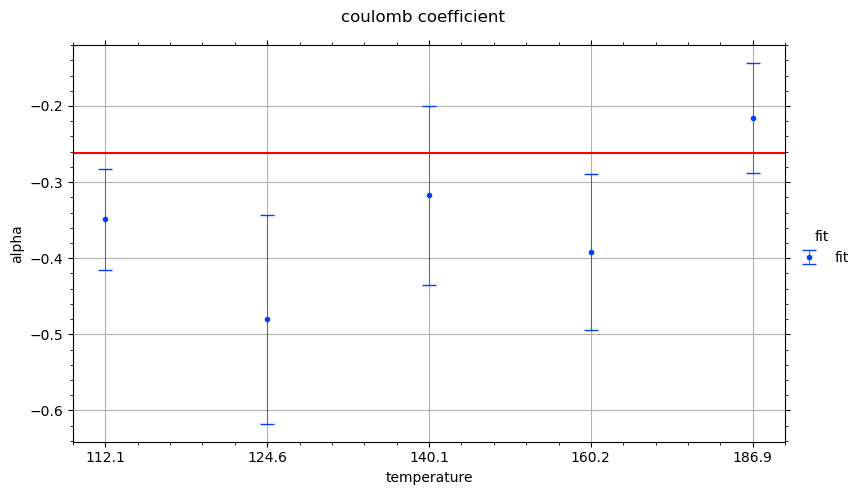

In [4]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'temperature'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x24/mu0.25/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/24/a:.1f}'}, 'constraints': {'time_size': (1, 12)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.25/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/28/a:.1f}'}, 'constraints': {'time_size': (1, 14)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^4/mu0.25/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/32/a:.1f}'}, 'constraints': {'time_size': (1, 16)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.25/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/36/a:.1f}'}, 'constraints': {'time_size': (1, 18)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.25/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'temperature': f'{1/40/a:.1f}'}, 'constraints': {'time_size': (1, 20)}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['temperature'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
print(df)
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, fit.func_exponent, ['V', 'a', 'b'], 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='temperature')
df_curves = df_curves.reset_index(level='temperature')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'temperature': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='temperature')
plots.plot_potential_single(df_fit, 'temperature', 'sigma', 'fit', 'temperature', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'temperature', 'alpha', 'fit', 'temperature', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

     r/a   T     aV(r)       err
mu                              
0.1    1   2  0.018288  0.000006
0.1    1   3  0.018137  0.000006
0.1    1   4  0.018089  0.000006
0.1    1   5  0.018067  0.000006
0.1    1   6  0.018056  0.000007
..   ...  ..       ...       ...
0.4   16  28  0.250333  0.169175
0.4   16  29  0.070977  0.257726
0.4   16  30  0.286695  0.236782
0.4   16  31  0.035879  0.198872
0.4   16  32  0.082272  0.203174

[1488 rows x 4 columns]


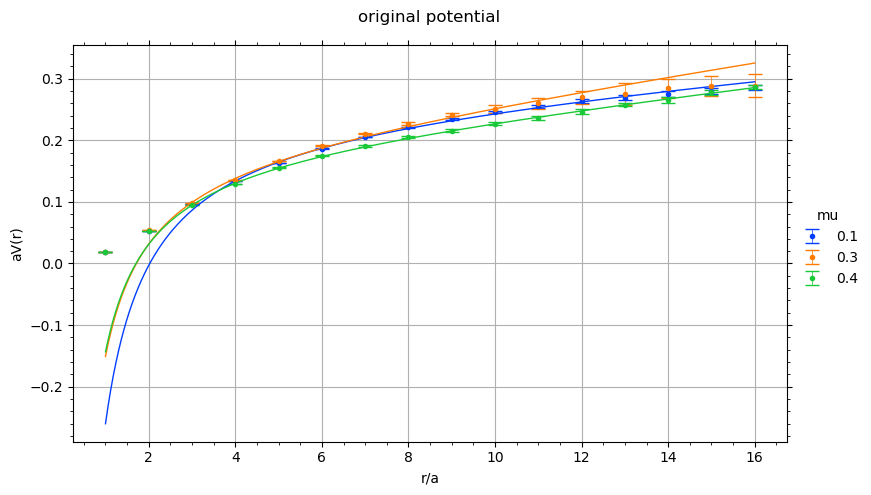

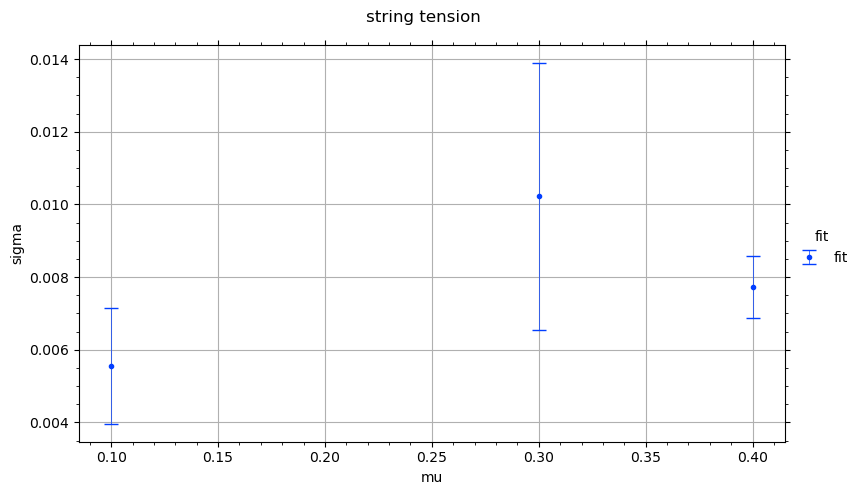

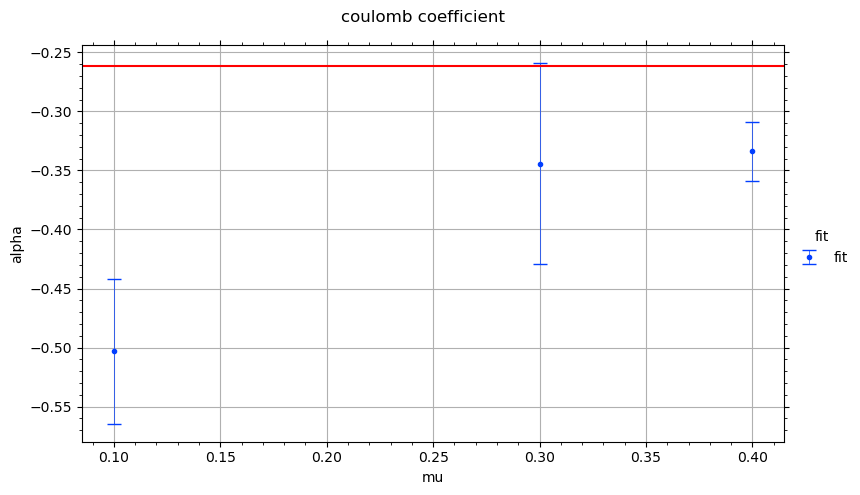

In [5]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'mu'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x64/mu0.10/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'mu': 0.1}, 'constraints': {'time_size': (1, 32)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x64/mu0.30/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'mu': 0.3}, 'constraints': {'time_size': (1, 32)}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x64/mu0.40/original/HYP2_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'mu': 0.4}, 'constraints': {'time_size': (1, 32)}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['mu'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
print(df)
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, fit.func_exponent, ['V', 'a', 'b'], 10, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='mu')
df_curves = df_curves.reset_index(level='mu')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'mu': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='mu')
plots.plot_potential_single(df_fit, 'mu', 'sigma', 'fit', 'mu', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'mu', 'alpha', 'fit', 'mu', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)